In [20]:

pip install scikit-learn imbalanced-learn pandas matplotlib plotnine joblib seaborn category-encoders xgboost lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
import warnings, os, json
from IPython.display import display
from pathlib import Path

In [22]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.width",None)


In [23]:
# PLOT THEME
theme_set(
        theme_minimal()
          + theme(
            figure_size=(18, 8),
            text=element_text(size=11),
            plot_title=element_text(size=16, fontweight="bold"),
            plot_subtitle=element_text(size=12, fontstyle="italic"),
            axis_title= element_text(size=12),
            axis_text=element_text(size=10),
             legend_text=element_text(size=10),
                     legend_position="bottom",
                     )
            )

In [24]:
#Paths
RAW_CSV="assault incidents data.csv"
OUT_DIR=Path("processed_data")
OUT_DIR.mkdir(parents=True,exist_ok=True)
ARTIFACT_DIR=Path("artifacts")
ARTIFACT_DIR.mkdir(parents=True, exist_ok=True)

In [25]:
# #DATA LOADING
assaults=pd.read_csv(RAW_CSV)
#load both sheets into a dictionanry of data frames
#sheets =pd.read_excel(assaults, sheet_name=None)

      

In [26]:
assaults


,Reporting Event Number,Age,Sex,Race,Ethnicity,Offense Start Date,Offense Code Name,NIBRS Code,Case Status,Division,Offense Address,Latitude,Longitude,COUNDIST,District_Count
0,8022012875,54.0,Female,Unknown,Unknown,2018-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),1,"604 S 3RD ST\nLOUISVILLE, KY 40202\nUNITED STATES",38.248468,-85.756551,4.0,307.0
1,8022042334,7.0,Female,White,Unknown,2018-01-01 00:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,Open/Active (MIG),NaN,"'@CAL\nLOUISVILLE, KY 40056\nUNITED STATES",NaN,NaN,NaN,NaN
2,8020034673,5.0,Female,Unknown,Unknown,2018-01-01 00:00:00,SODOMY - 1ST DEGREE - VICTIM U/12 YEARS OF AGE...,11B,Investigation Completed,NaN,"'@CAL\nLOUISVILLE, KY 40056\nUNITED STATES",NaN,NaN,NaN,NaN
3,8022071938,14.0,Male,Asian,Not Hispanic Or Latino,2018-01-01 00:00:00,SODOMY - 3RD DEGREE 510.090 11205 11B,11B,Cleared by Arrest,6,"3823 RIMONTE DR\nLOUISVILLE, KY 40220\nUNITED ...",38.213538,-85.621250,26.0,52.0
4,8018010966,11.0,Female,White,Unknown,2018-01-01 00:00:00,SEXUAL ABUSE - 1ST DEGREE- VICTIM U/12 YOA 510...,11D,Closed/Cleared - MIG,3,"7755 BROOKVIEW DR\nLOUISVILLE, KY 40214\nUNITE...",38.149932,-85.816887,25.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,LMPD23124624,4.0,Female,White,Not Hispanic Or Latino,2023-12-18 08:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,NaN,7,"7607 ASHTON PARK CIR\nLOUISVILLE, KY 40228\nUN...",38.134511,-85.612740,23.0,41.0
2266,LMPD23125623,4.0,Female,White,Not Hispanic Or Latino,2023-12-19 12:00:00,SODOMY - 1ST DEGREE - VICTIM U/12 YEARS OF AGE...,11B,NaN,7,"3510 RIPPLE CREEK DR\nLOUISVILLE, KY 40229",38.100010,-85.695542,13.0,95.0
2267,LMPD23126445,24.0,Female,Black,Not Hispanic Or Latino,2023-12-22 12:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,2,"3911 MIAMI AVE\nLOUISVILLE, KY 40212",38.272840,-85.812416,5.0,180.0
2268,LMPD23128103,27.0,Female,White,NaN,2023-12-26 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,1,"400 S 6TH ST\nLOUISVILLE, KY 40202",38.253217,-85.761074,4.0,307.0


In [27]:
#filter only rows where the year =2023
# Convert to datetime using the correct column name
assaults['Offense Start Date'] = pd.to_datetime(assaults['Offense Start Date'], errors='coerce')

# Filter rows where the year is 2023
assaults_2023 = assaults[assaults['Offense Start Date'].dt.year == 2023]


In [28]:
assaults_2023

,Reporting Event Number,Age,Sex,Race,Ethnicity,Offense Start Date,Offense Code Name,NIBRS Code,Case Status,Division,Offense Address,Latitude,Longitude,COUNDIST,District_Count
1954,LMPD23046471,12.0,Female,White,Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,8,"4808 MIDDLESEX DR\nWORTHINGTON HILLS, KY 40245",38.308736,-85.522934,17.0,48.0
1955,LMPD23088980,15.0,Female,White,Not Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,8,"3106 KINVARA LN\nGOOSE CREEK, KY 40242",38.291753,-85.592448,17.0,48.0
1956,8023000106,24.0,Male,White,Not Hispanic Or Latino,2023-01-01 09:22:00,SODOMY - 1ST DEGREE 510.070 11180 11B,11B,Open/Active (MIG),4,"1400 S 4TH ST\nLOUISVILLE, KY 40208\nUNITED ST...",38.228918,-85.761789,6.0,152.0
1957,8023001279,33.0,Male,Black,Not Hispanic Or Latino,2023-01-01 10:49:00,SODOMY - 1ST DEGREE 510.070 11180 11B,11B,SVU Only - Victim Requests Closure,1,"407 S 10TH ST\nLOUISVILLE, KY 40203\nUNITED ST...",38.253677,-85.766986,4.0,307.0
1958,LMPD23065400,6.0,Male,White,Not Hispanic Or Latino,2023-01-01 12:00:00,SEXUAL ABUSE - 1ST DEGREE 510.110 11220 11D,11D,Investigation Completed,4,"4158 HAZELWOOD AVE\nLOUISVILLE, KY 40215",38.173381,-85.793552,15.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,LMPD23124624,4.0,Female,White,Not Hispanic Or Latino,2023-12-18 08:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,NaN,7,"7607 ASHTON PARK CIR\nLOUISVILLE, KY 40228\nUN...",38.134511,-85.612740,23.0,41.0
2266,LMPD23125623,4.0,Female,White,Not Hispanic Or Latino,2023-12-19 12:00:00,SODOMY - 1ST DEGREE - VICTIM U/12 YEARS OF AGE...,11B,NaN,7,"3510 RIPPLE CREEK DR\nLOUISVILLE, KY 40229",38.100010,-85.695542,13.0,95.0
2267,LMPD23126445,24.0,Female,Black,Not Hispanic Or Latino,2023-12-22 12:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,2,"3911 MIAMI AVE\nLOUISVILLE, KY 40212",38.272840,-85.812416,5.0,180.0
2268,LMPD23128103,27.0,Female,White,NaN,2023-12-26 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,1,"400 S 6TH ST\nLOUISVILLE, KY 40202",38.253217,-85.761074,4.0,307.0



Missing values summary:
Total variables with missing values: 8
Variables with >50% missing: 1
Variables with >20% missing: 1


,Variable,Missing_count,Missing_Percentage
8,Case Status,168,53.16
4,Ethnicity,28,8.86
13,COUNDIST,28,8.86
14,District_Count,28,8.86
11,Latitude,21,6.65
12,Longitude,21,6.65
9,Division,19,6.01
1,Age,8,2.53


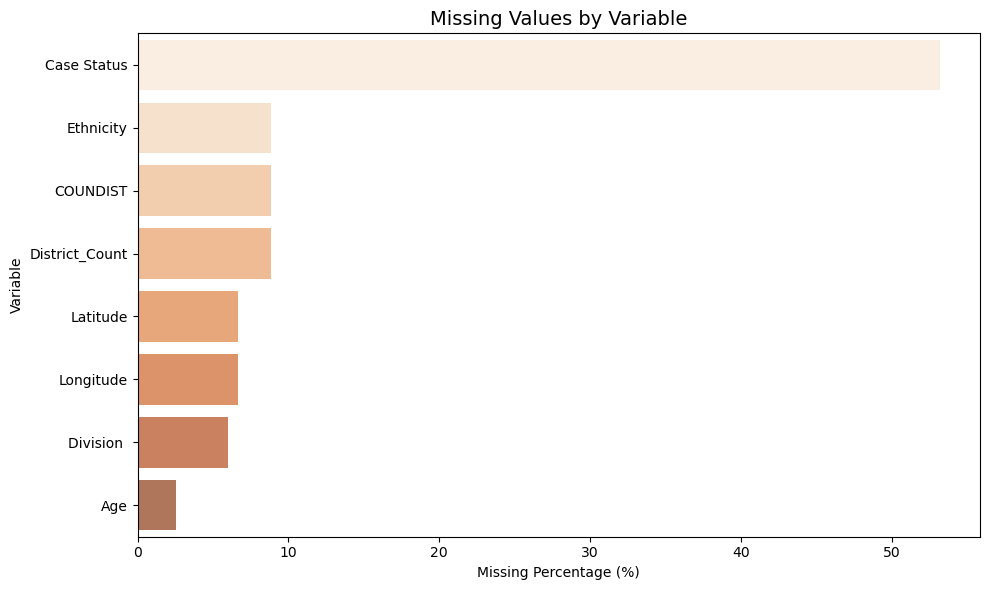

In [29]:
# Missing values summary
# Step 1: Calculate missing data
missing_data = assaults_2023.isnull().sum()
missing_pct = (missing_data / len(assaults_2023)) * 100

# Step 2: Create summary DataFrame
missing_summary = (
    pd.DataFrame({
        "Variable": missing_data.index,
        "Missing_count": missing_data.values,
        "Missing_Percentage": missing_pct.values
    })
    .query("Missing_count > 0")
    .sort_values("Missing_count", ascending=False)
)

# Step 3: Print summary stats
print("\nMissing values summary:")
print(f"Total variables with missing values: {len(missing_summary)}")
print(f"Variables with >50% missing: {sum(missing_summary['Missing_Percentage'] > 50)}")
print(f"Variables with >20% missing: {sum(missing_summary['Missing_Percentage'] > 20)}")

# Step 4: Display top 10
if len(missing_summary) > 0:
    display(missing_summary.head(10).round(2))

    # Step 5: Plot top 15 missing variables
    top_missing = missing_summary.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_missing,
    x='Missing_Percentage',
    y='Variable',
    palette='Oranges',  # Changed from 'Reds_r' to 'Oranges'
    alpha=0.7
)
plt.title('Missing Values by Variable', fontsize=14)
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [30]:
#Calculate basic dataset dimensions
n_rows, n_cols= assaults_2023.shape
# Displays the data set size and information
print("Dataset Dimensions:")
print(f"-Total observations(rows): {n_rows:,}")
print(f"-Total observations(rows): {n_cols:,}")

Dataset Dimensions:
-Total observations(rows): 316
-Total observations(rows): 15


In [31]:
#Classify variables by type
all_cols=assaults_2023.columns.tolist()

# Get numeric and categorical variable
all_cols

['Reporting Event Number',
 'Age',
 'Sex',
 'Race',
 'Ethnicity',
 'Offense Start Date',
 'Offense Code Name',
 'NIBRS Code',
 'Case Status',
 'Division ',
 'Offense Address',
 'Latitude',
 'Longitude',
 'COUNDIST',
 'District_Count']

In [32]:
assaults_2023.shape

(316, 15)

In [33]:
#Duplicates
duplicate_count= assaults_2023.duplicated().sum()
display(pd.DataFrame({'Duplicate_Rows':[duplicate_count]}))

,Duplicate_Rows
0,0


In [34]:
assaults_2023.shape

(316, 15)

In [35]:
assaults_2023 = assaults_2023.dropna(subset=['Age', 'COUNDIST'])


In [36]:
#  Convert both columns to integer
assaults_2023['Age'] = assaults_2023['Age'].round().astype(int)
assaults_2023['COUNDIST'] = assaults_2023['COUNDIST'].round().astype(int)


In [37]:
assaults_2023

,Reporting Event Number,Age,Sex,Race,Ethnicity,Offense Start Date,Offense Code Name,NIBRS Code,Case Status,Division,Offense Address,Latitude,Longitude,COUNDIST,District_Count
1954,LMPD23046471,12,Female,White,Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,8,"4808 MIDDLESEX DR\nWORTHINGTON HILLS, KY 40245",38.308736,-85.522934,17,48.0
1955,LMPD23088980,15,Female,White,Not Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,8,"3106 KINVARA LN\nGOOSE CREEK, KY 40242",38.291753,-85.592448,17,48.0
1956,8023000106,24,Male,White,Not Hispanic Or Latino,2023-01-01 09:22:00,SODOMY - 1ST DEGREE 510.070 11180 11B,11B,Open/Active (MIG),4,"1400 S 4TH ST\nLOUISVILLE, KY 40208\nUNITED ST...",38.228918,-85.761789,6,152.0
1957,8023001279,33,Male,Black,Not Hispanic Or Latino,2023-01-01 10:49:00,SODOMY - 1ST DEGREE 510.070 11180 11B,11B,SVU Only - Victim Requests Closure,1,"407 S 10TH ST\nLOUISVILLE, KY 40203\nUNITED ST...",38.253677,-85.766986,4,307.0
1958,LMPD23065400,6,Male,White,Not Hispanic Or Latino,2023-01-01 12:00:00,SEXUAL ABUSE - 1ST DEGREE 510.110 11220 11D,11D,Investigation Completed,4,"4158 HAZELWOOD AVE\nLOUISVILLE, KY 40215",38.173381,-85.793552,15,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,LMPD23124624,4,Female,White,Not Hispanic Or Latino,2023-12-18 08:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,NaN,7,"7607 ASHTON PARK CIR\nLOUISVILLE, KY 40228\nUN...",38.134511,-85.612740,23,41.0
2266,LMPD23125623,4,Female,White,Not Hispanic Or Latino,2023-12-19 12:00:00,SODOMY - 1ST DEGREE - VICTIM U/12 YEARS OF AGE...,11B,NaN,7,"3510 RIPPLE CREEK DR\nLOUISVILLE, KY 40229",38.100010,-85.695542,13,95.0
2267,LMPD23126445,24,Female,Black,Not Hispanic Or Latino,2023-12-22 12:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,2,"3911 MIAMI AVE\nLOUISVILLE, KY 40212",38.272840,-85.812416,5,180.0
2268,LMPD23128103,27,Female,White,NaN,2023-12-26 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,1,"400 S 6TH ST\nLOUISVILLE, KY 40202",38.253217,-85.761074,4,307.0


In [ ]:

# Load & prepare assault data
assaults_2023['Offense Start Date'] = pd.to_datetime(
    assaults_2023['Offense Start Date']
)

assaults_2023['Hour'] = assaults_2023['Offense Start Date'].dt.hour
assaults_2023['Year'] = assaults_2023['Offense Start Date'].dt.year
assaults_2023['Date'] = assaults_2023['Offense Start Date'].dt.date
assaults_2023['Time'] = assaults_2023['Offense Start Date'].dt.time

# Read & parse Louisville sunrise/sunset file (2023)
file_path = "sunset&sunrise_times.txt"
lines = open(file_path, "r").readlines()

sun_records = []

for line in lines:
    if line.strip()[:2].isdigit():
        day = int(line[0:2])
        col = 2

        for month in range(12):
            rise = line[col:col+4].strip()
            set_ = line[col+5:col+9].strip()
            col += 11

            if rise and set_:
                sunrise = time(int(rise[:2]), int(rise[2:]))
                sunset = time(int(set_[:2]), int(set_[2:]))

                date = pd.to_datetime(
                    f"2023-{month+1:02d}-{day:02d}"
                ).date()

                sun_records.append({
                    "Date": date,
                    "Sunrise": sunrise,
                    "Sunset": sunset
                })

sun_df = pd.DataFrame(sun_records)

# Merge sunrise/sunset into assault data
assaults_2023 = assaults_2023.merge(
    sun_df,
    on="Date",
    how="left"
)

#Flag nighttime incidents (Sunset → Sunrise)
assaults_2023['Is_Nighttime'] = (
    (assaults_2023['Time'] >= assaults_2023['Sunset']) |
    (assaults_2023['Time'] < assaults_2023['Sunrise'])
)

# Filter for nighttime incidents in 2023

night_df = assaults_2023[
    (assaults_2023['Year'] == 2023) &
    (assaults_2023['Is_Nighttime'])
]

# Group by month and count incidents
monthly_counts = (
    night_df['Offense Start Date']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)

# Convert to summary DataFrame
monthly_summary = monthly_counts.reset_index(name='Incident_Count')
monthly_summary.rename(columns={'index': 'Month'}, inplace=True)

# Calculate percentage
monthly_summary['Percentage'] = (
    monthly_summary['Incident_Count'] /
    monthly_summary['Incident_Count'].sum() * 100
)
# Round percentage
monthly_summary['Percentage'] = monthly_summary['Percentage'].round(2)

# Display result
print("Monthly incident summary (Nighttime, 2023):")
print(monthly_summary)



In [ ]:
night_df = assaults_2023[
    (assaults_2023['Year'] == 2023) &
    (assaults_2023['Is_Nighttime'])
]


In [40]:
night_df.shape


(152, 18)

In [41]:
night_df

,Reporting Event Number,Age,Sex,Race,Ethnicity,Offense Start Date,Offense Code Name,NIBRS Code,Case Status,Division,Offense Address,Latitude,Longitude,COUNDIST,District_Count,Hour,Is_Nighttime,Year
1954,LMPD23046471,12,Female,White,Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,8,"4808 MIDDLESEX DR\nWORTHINGTON HILLS, KY 40245",38.308736,-85.522934,17,48.0,0,True,2023
1955,LMPD23088980,15,Female,White,Not Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,8,"3106 KINVARA LN\nGOOSE CREEK, KY 40242",38.291753,-85.592448,17,48.0,0,True,2023
1961,8023001005,11,Female,White,Not Hispanic Or Latino,2023-01-02 18:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,Open/Active (MIG),6,"2830 POMEROY DR\nLOUISVILLE, KY 40218\nUNITED ...",38.199039,-85.635948,10,91.0,18,True,2023
1962,8023001274,17,Female,White,Not Hispanic Or Latino,2023-01-02 20:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),1,"1698 MAGAZINE ST\nLOUISVILLE, KY 40203\nUNITED...",38.250003,-85.779622,4,307.0,20,True,2023
1964,8023001635,19,Female,White,Not Hispanic Or Latino,2023-01-04 01:08:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),4,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.239471,-85.761667,6,152.0,1,True,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,LMPD23123249,16,Female,White,Hispanic Or Latino,2023-12-14 03:50:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,6,"1367 GARDINER LN\nWATTERSON PARK, KY 40213",38.197717,-85.700115,10,91.0,3,True,2023
2263,LMPD23129385,18,Female,White,Hispanic Or Latino,2023-12-15 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,7,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.170449,-85.603572,26,52.0,0,True,2023
2264,LMPD23124681,31,Female,White,Not Hispanic Or Latino,2023-12-15 22:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,SVU Only - Victim Requests Closure,2,"4713 BEECH DR\nLOUISVILLE, KY 40216",38.202771,-85.844656,1,100.0,22,True,2023
2268,LMPD23128103,27,Female,White,NaN,2023-12-26 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,1,"400 S 6TH ST\nLOUISVILLE, KY 40202",38.253217,-85.761074,4,307.0,0,True,2023


In [42]:
# Gender count across all incidents
gender_counts = night_df['Sex'].value_counts()

# Display results
print("Gender count for all incidents (no filters):")
print(gender_counts)


Gender count for all incidents (no filters):
Sex
Female    145
Male        7
Name: count, dtype: int64


In [43]:
night_df

,Reporting Event Number,Age,Sex,Race,Ethnicity,Offense Start Date,Offense Code Name,NIBRS Code,Case Status,Division,Offense Address,Latitude,Longitude,COUNDIST,District_Count,Hour,Is_Nighttime,Year
1954,LMPD23046471,12,Female,White,Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,8,"4808 MIDDLESEX DR\nWORTHINGTON HILLS, KY 40245",38.308736,-85.522934,17,48.0,0,True,2023
1955,LMPD23088980,15,Female,White,Not Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,8,"3106 KINVARA LN\nGOOSE CREEK, KY 40242",38.291753,-85.592448,17,48.0,0,True,2023
1961,8023001005,11,Female,White,Not Hispanic Or Latino,2023-01-02 18:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,Open/Active (MIG),6,"2830 POMEROY DR\nLOUISVILLE, KY 40218\nUNITED ...",38.199039,-85.635948,10,91.0,18,True,2023
1962,8023001274,17,Female,White,Not Hispanic Or Latino,2023-01-02 20:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),1,"1698 MAGAZINE ST\nLOUISVILLE, KY 40203\nUNITED...",38.250003,-85.779622,4,307.0,20,True,2023
1964,8023001635,19,Female,White,Not Hispanic Or Latino,2023-01-04 01:08:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),4,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.239471,-85.761667,6,152.0,1,True,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,LMPD23123249,16,Female,White,Hispanic Or Latino,2023-12-14 03:50:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,6,"1367 GARDINER LN\nWATTERSON PARK, KY 40213",38.197717,-85.700115,10,91.0,3,True,2023
2263,LMPD23129385,18,Female,White,Hispanic Or Latino,2023-12-15 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,7,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.170449,-85.603572,26,52.0,0,True,2023
2264,LMPD23124681,31,Female,White,Not Hispanic Or Latino,2023-12-15 22:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,SVU Only - Victim Requests Closure,2,"4713 BEECH DR\nLOUISVILLE, KY 40216",38.202771,-85.844656,1,100.0,22,True,2023
2268,LMPD23128103,27,Female,White,NaN,2023-12-26 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,1,"400 S 6TH ST\nLOUISVILLE, KY 40202",38.253217,-85.761074,4,307.0,0,True,2023


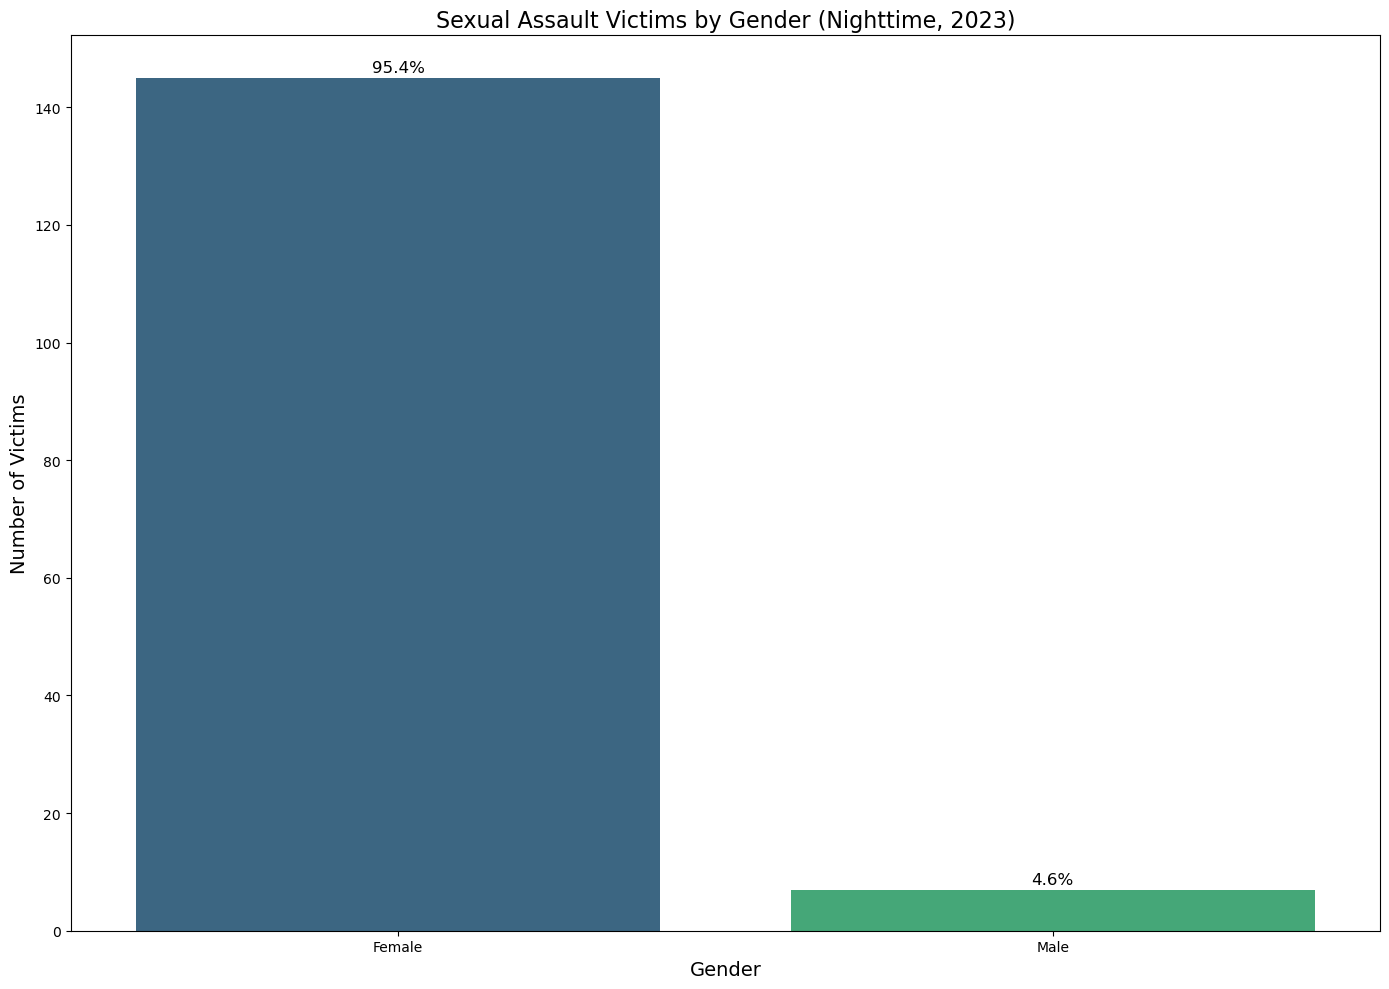

In [44]:
# Step 4: Count gender (no filtering)
gender_counts = night_df['Sex'].value_counts()

# Step 5: Create bar chart
plt.figure(figsize=(14, 10))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")

# Add percentage labels
for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 1, f"{(value / gender_counts.sum()) * 100:.1f}%", ha='center', fontsize=12)

# Chart labels and title
plt.title("Sexual Assault Victims by Gender (Nighttime, 2023)", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Victims", fontsize=14)
plt.tight_layout()
plt.show()


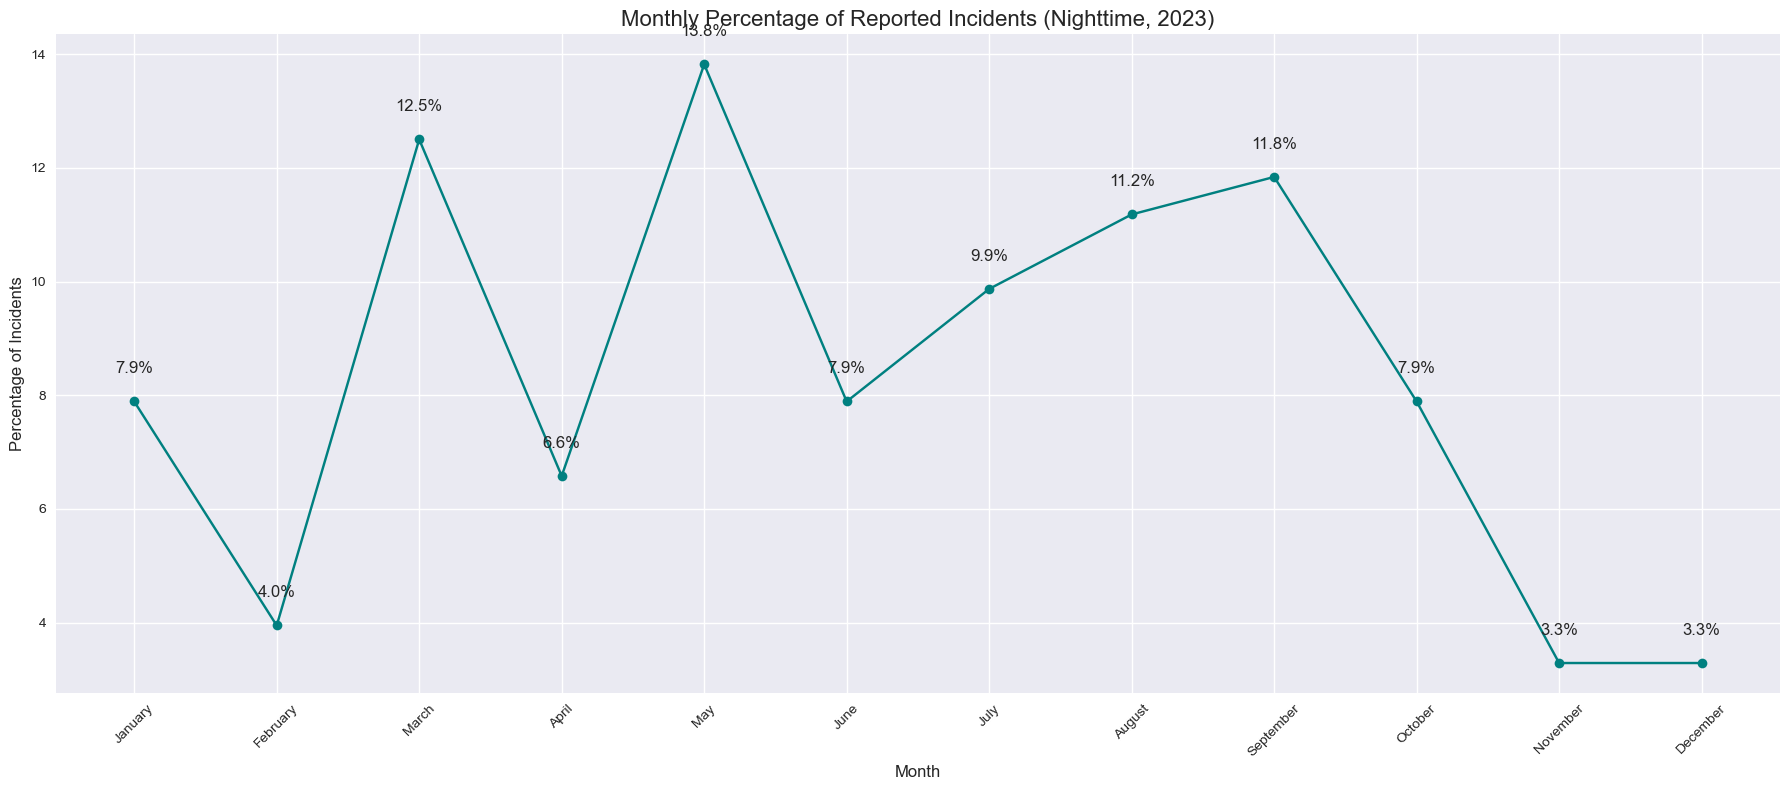

In [45]:
# Use a clean style for aesthetics
plt.style.use('seaborn-v0_8')

# Ensure 'Offense Start Date' is datetime
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Extract year and month
night_df['Year'] = night_df['Offense Start Date'].dt.year
night_df['month'] = night_df['Offense Start Date'].dt.month

# Count incidents per month for 2023
monthly_counts = night_df[night_df['Year'] == 2023]['month'].value_counts().sort_index()

# Calculate percentages
total_incidents = monthly_counts.sum()
monthly_percentages = (monthly_counts / total_incidents * 100).round(2)

# Prepare labels and values
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
data_values = [monthly_percentages.get(i, 0) for i in range(1, 13)]  # Fill missing months with 0

# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(months, data_values, marker='o', linestyle='-', color='teal')

# Add percentage labels
for i, value in enumerate(data_values):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=12)

# Add labels and title
ax.set_title("Monthly Percentage of Reported Incidents (Nighttime, 2023)", fontsize=16)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Percentage of Incidents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


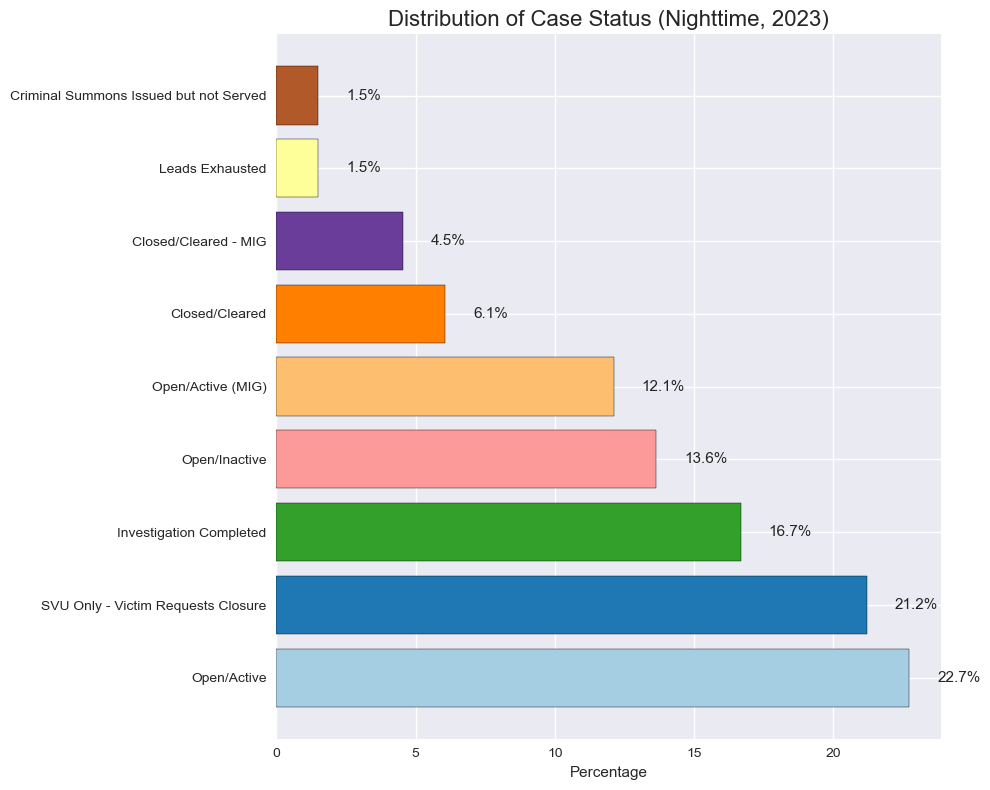

In [46]:
# Ensure 'Offense Start Date' is datetime
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Extract year
night_df['Year'] = night_df['Offense Start Date'].dt.year

# Filter for 2023 only (nighttime already handled in night_df)
df_2023_night = night_df[night_df['Year'] == 2023]

# Count each Case Status and calculate percentages
case_counts = df_2023_night['Case Status'].value_counts()
case_percentages = (case_counts / case_counts.sum()) * 100

# Generate Paired colors
colors = plt.cm.Paired(np.linspace(0, 1, len(case_percentages)))

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(
    case_percentages.index,
    case_percentages.values,
    color=colors,
    edgecolor='black'
)

# Add percentage labels next to bars
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}%',
        va='center',
        fontsize=11
    )

# Title and layout
ax.set_title("Distribution of Case Status (Nighttime, 2023)", fontsize=16)
ax.set_xlabel("Percentage")
plt.tight_layout()
plt.show()


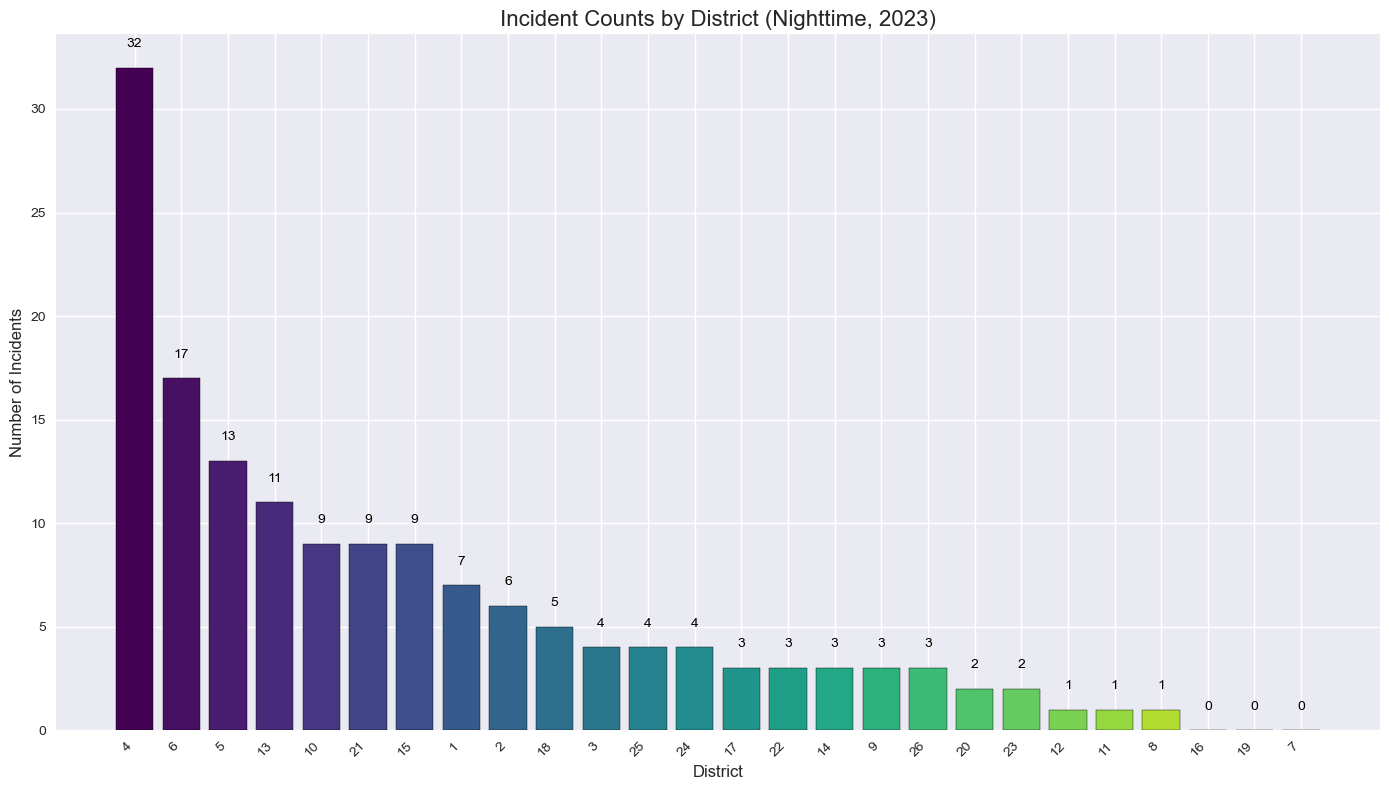

In [48]:
from matplotlib import cm

# Step 1: Ensure datetime format
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Step 2: Extract year
night_df['Year'] = night_df['Offense Start Date'].dt.year

# Step 3: Filter for 2023 only (nighttime already handled in night_df)
df_2023_night = night_df[night_df['Year'] == 2023]

# Step 4: Define all expected district numbers
all_districts = list(range(1, 27))  # Adjust range if needed

# Step 5: Count incidents and reindex to include all districts
district_counts = df_2023_night['COUNDIST'].value_counts().reindex(all_districts, fill_value=0)

# Step 6: Sort districts by incident count in descending order
district_counts = district_counts.sort_values(ascending=False)

# Step 7: Generate viridis colors
num_districts = len(district_counts)
colors = cm.viridis(np.linspace(0, 1, num_districts))

# Step 8: Create the bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar([str(d) for d in district_counts.index], district_counts.values, color=colors, edgecolor='black')

# Step 9: Add labels and title
ax.set_title("Incident Counts by District (Nighttime, 2023)", fontsize=16)
ax.set_xlabel("District", fontsize=12)
ax.set_ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Step 10: Add actual incident counts above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{int(height):,}", ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()



In [49]:
# Count incidents per district
district_counts = night_df[night_df['Year'] == 2023]['COUNDIST'].value_counts().sort_index()

# Convert to DataFrame
district_table = district_counts.reset_index()
district_table.columns = ['District_Number', 'Incident_Count']

# Display the table
print("Incident Counts by District Number:")
display(district_table)


Incident Counts by District Number:


,District_Number,Incident_Count
0,1,7
1,2,6
2,3,4
3,4,32
4,5,13
5,6,17
6,8,1
7,9,3
8,10,9
9,11,1


In [50]:
# Calculate total incidents across all districts
total_incidents = district_table['Incident_Count'].sum()

# Display the total
print(f"Total Incidents Across All Districts (2023 Nighttime): {total_incidents:,}")


Total Incidents Across All Districts (2023 Nighttime): 152


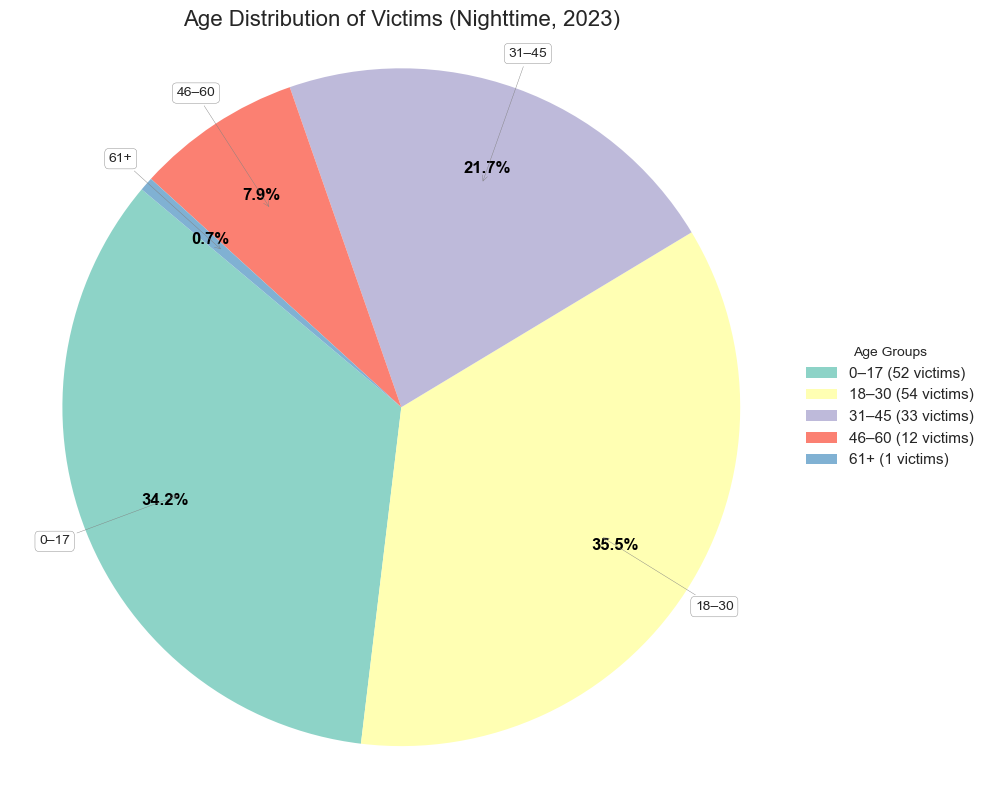

In [51]:

# Step 1: Ensure datetime format
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Step 2: Extract year
night_df['Year'] = night_df['Offense Start Date'].dt.year

# Step 3: Filter for 2023 only (nighttime already handled in night_df)
df_2023_night = night_df[night_df['Year'] == 2023]

# Step 4: Define age bins and labels
bins = [0, 17, 30, 45, 60, 150]
labels = ['0–17', '18–30', '31–45', '46–60', '61+']

# Step 5: Create age groups
df_2023_night['Age Group'] = pd.cut(df_2023_night['Age'], bins=bins, labels=labels, right=True)

# Step 6: Summarize victim counts and percentages
age_summary = df_2023_night['Age Group'].value_counts().sort_index().reset_index()
age_summary.columns = ['Age Group', 'Victim Count']
age_summary['Percentage'] = (age_summary['Victim Count'] / age_summary['Victim Count'].sum() * 100).round(2)

# Step 7: Prepare data for pie chart
labels = age_summary['Age Group'].astype(str)
sizes = age_summary['Percentage']
counts = age_summary['Victim Count']
colors = plt.cm.Set3.colors[:len(labels)]

# Step 8: Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.75
)

# Step 9: Add legend
ax.legend(
    wedges,
    [f"{label} ({count} victims)" for label, count in zip(labels, counts)],
    title="Age Groups",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

# Step 10: Style percentage labels
for text in autotexts:
    text.set_fontsize(12)
    text.set_color('black')
    text.set_weight('bold')

# Step 11: Annotate wedges with arrows
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    ax.annotate(
        f"{labels[i]}",
        xy=(x * 0.7, y * 0.7),
        xytext=(x * 1.1, y * 1.1),
        arrowprops=dict(arrowstyle="->", color='gray'),
        ha='center',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray")
    )

# Final touches
ax.set_title("Age Distribution of Victims (Nighttime, 2023)", fontsize=16)
ax.axis('equal')
plt.tight_layout()
plt.show()


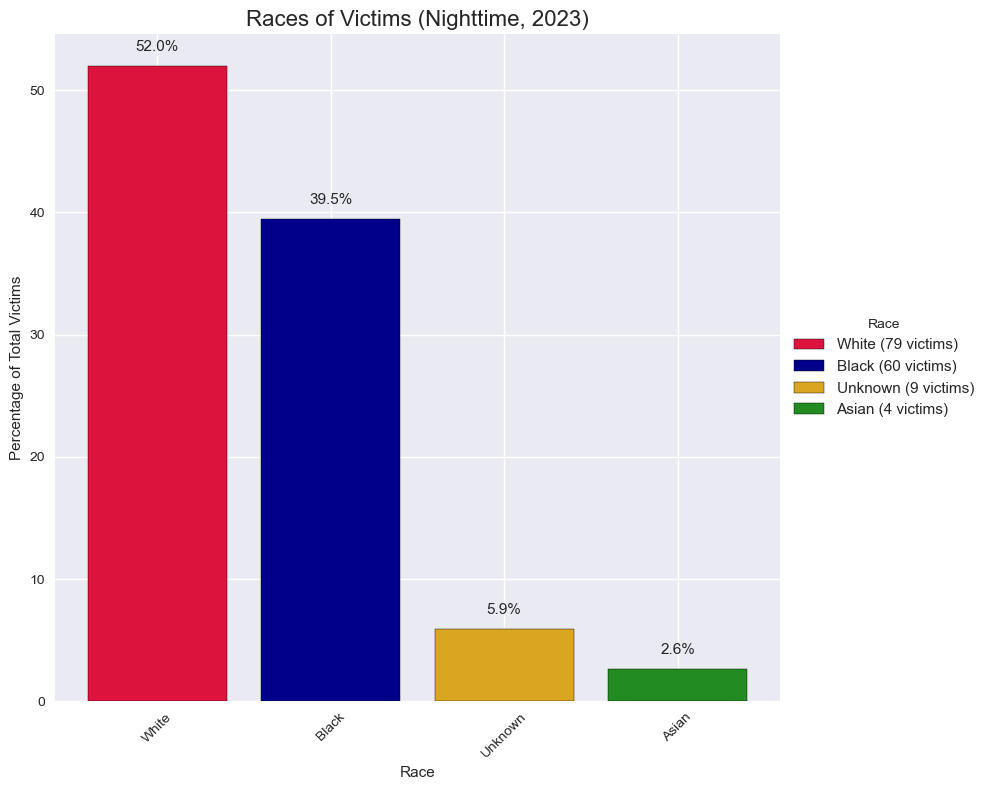

In [52]:

# Step 1: Ensure datetime format
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Step 2: Extract year
night_df['Year'] = night_df['Offense Start Date'].dt.year

# Step 3: Filter for 2023 only (nighttime already handled in night_df)
df_2023_night = night_df[night_df['Year'] == 2023]

# Step 4: Prepare race data
race_counts = df_2023_night['Race'].value_counts()
race_percentages = (race_counts / race_counts.sum()) * 100
labels = race_counts.index
percent_values = race_percentages.round(2).values
counts = race_counts.values

# Step 5: Define custom colors
custom_colors = ['crimson', 'darkblue', 'goldenrod', 'forestgreen', 'purple', 'orange'][:len(labels)]

# Step 6: Create bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(
    labels,
    percent_values,
    color=custom_colors,
    edgecolor='black'
)

# Step 7: Add percentage labels on top of bars
for bar, percent in zip(bars, percent_values):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{percent:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11
    )

# Step 8: Add legend
ax.legend(
    bars,
    [f"{label} ({count} victims)" for label, count in zip(labels, counts)],
    title="Race",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

# Step 9: Title and layout
ax.set_title("Races of Victims (Nighttime, 2023)", fontsize=16)
ax.set_ylabel("Percentage of Total Victims")
ax.set_xlabel("Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




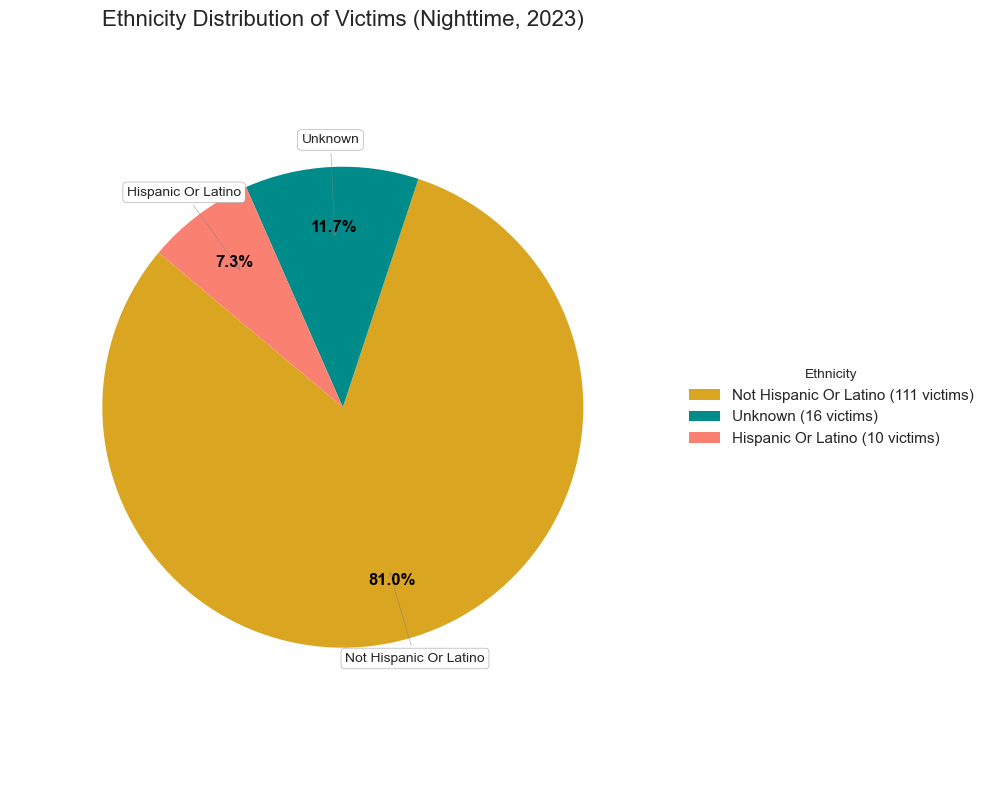

In [53]:
# Step 1: Ensure datetime format
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Step 2: Extract year
night_df['Year'] = night_df['Offense Start Date'].dt.year

# Step 3: Filter for 2023 only (nighttime already handled in night_df)
df_2023_night = night_df[night_df['Year'] == 2023]

# Step 4: Prepare ethnicity data
ethnicity_counts = df_2023_night['Ethnicity'].value_counts()
ethnicity_percentages = (ethnicity_counts / ethnicity_counts.sum()) * 100
labels = ethnicity_counts.index
sizes = ethnicity_percentages.round(2).values
counts = ethnicity_counts.values

# Step 5: Define custom colors
custom_colors = ['goldenrod', 'darkcyan', 'salmon', 'mediumorchid', 'steelblue', 'darkgreen'][:len(labels)]

# Step 6: Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors,
    pctdistance=0.75
)

# Step 7: Add legend
ax.legend(
    wedges,
    [f"{label} ({count} victims)" for label, count in zip(labels, counts)],
    title="Ethnicity",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

# Step 8: Style percentage labels
for text in autotexts:
    text.set_fontsize(12)
    text.set_color('black')
    text.set_weight('bold')

# Step 9: Annotate wedges with arrows and labels
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    ax.annotate(
        f"{labels[i]}",
        xy=(x * 0.7, y * 0.7),
        xytext=(x * 1.1, y * 1.1),
        arrowprops=dict(arrowstyle="->", color='gray'),
        ha='center',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray")
    )

# Final touches
ax.set_title("Ethnicity Distribution of Victims (Nighttime, 2023)", fontsize=16)
ax.axis('equal')
plt.tight_layout()
plt.show()


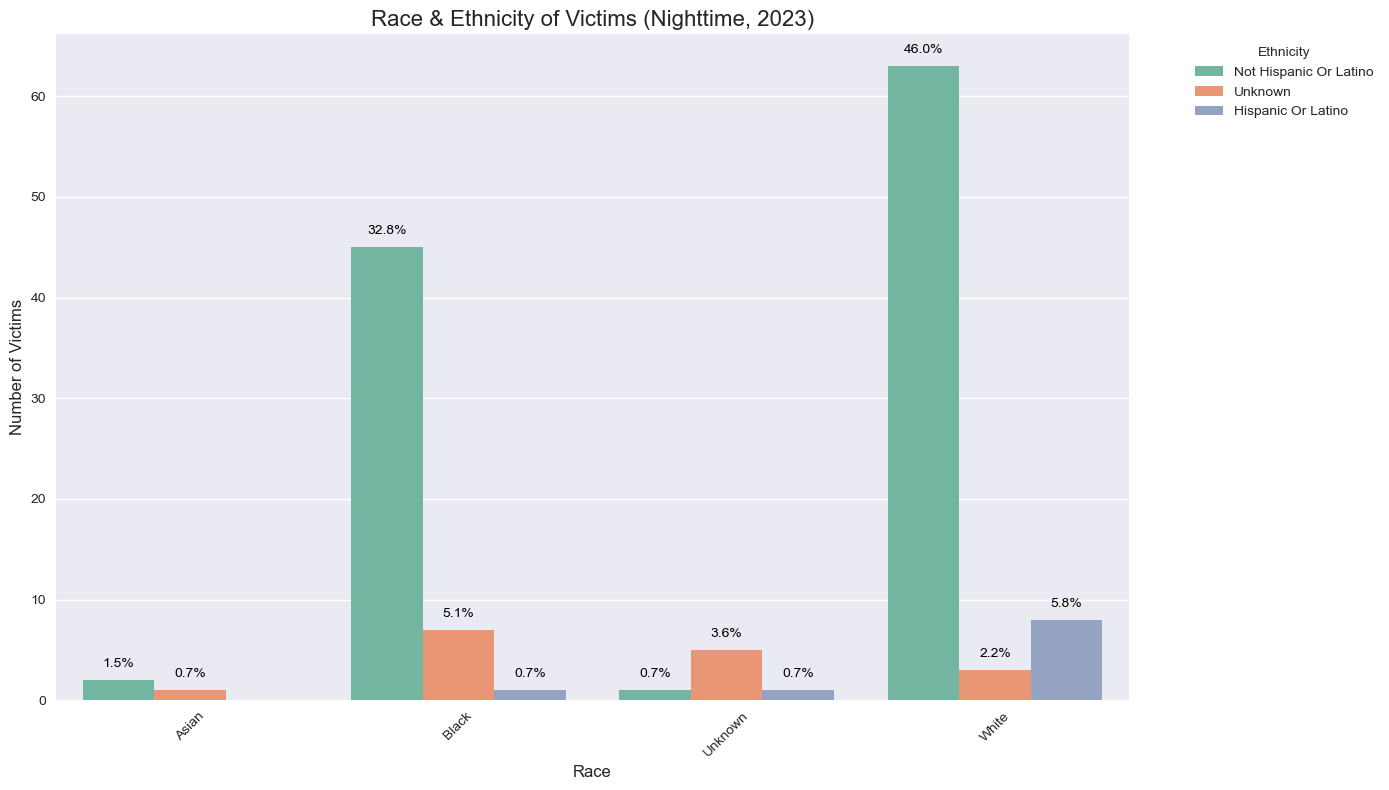

In [54]:
# Step 1: Ensure datetime format
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Step 2: Extract year
night_df['Year'] = night_df['Offense Start Date'].dt.year

# Step 3: Filter for 2023 only (nighttime already handled in night_df)
df_2023_night = night_df[night_df['Year'] == 2023]

# Step 4: Group by Race and Ethnicity
race_ethnicity_counts = df_2023_night.groupby(['Race', 'Ethnicity']).size().reset_index(name='Victim Count')

# Step 5: Calculate total and percentage
total_victims = race_ethnicity_counts['Victim Count'].sum()
race_ethnicity_counts['Percentage'] = (race_ethnicity_counts['Victim Count'] / total_victims * 100).round(2)

# Step 6: Create grouped bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=race_ethnicity_counts, x='Race', y='Victim Count', hue='Ethnicity', palette='Set2')

# Step 7: Add percentage labels on top of bars
for container in barplot.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            barplot.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f"{(height / total_victims) * 100:.1f}%",
                ha='center',
                va='bottom',
                fontsize=10,
                color='black'
            )

# Step 8: Add labels and title
plt.title("Race & Ethnicity of Victims (Nighttime, 2023)", fontsize=16)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Number of Victims", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


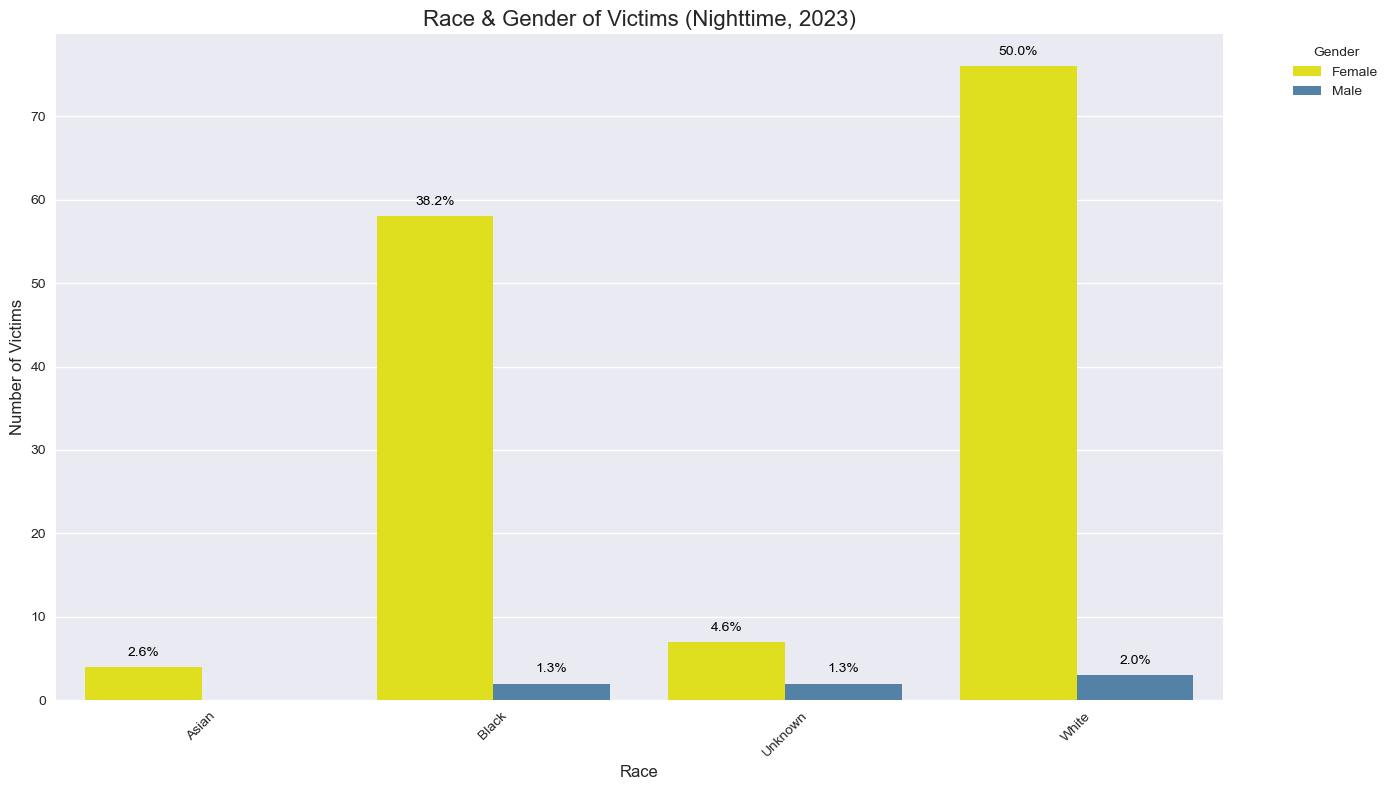

In [55]:
# Step 1: Ensure datetime format
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Step 2: Extract year
night_df['Year'] = night_df['Offense Start Date'].dt.year

# Step 3: Filter for 2023 only (nighttime already handled in night_df)
df_2023_night = night_df[night_df['Year'] == 2023]

# Step 4: Group by Race and Gender
race_gender_counts = df_2023_night.groupby(['Race', 'Sex']).size().reset_index(name='Victim Count')

# Step 5: Calculate total and percentage
total_victims = race_gender_counts['Victim Count'].sum()
race_gender_counts['Percentage'] = (race_gender_counts['Victim Count'] / total_victims * 100).round(2)

# Step 6: Define custom colors for gender
gender_palette = {'Female': 'yellow', 'Male': 'steelblue'}

# Step 7: Create grouped bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=race_gender_counts,
    x='Race',
    y='Victim Count',
    hue='Sex',
    palette=gender_palette
)

# Step 8: Add percentage labels on top of bars
for container in barplot.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            barplot.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f"{(height / total_victims) * 100:.1f}%",
                ha='center',
                va='bottom',
                fontsize=10,
                color='black'
            )

# Step 9: Add labels and title
plt.title("Race & Gender of Victims (Nighttime, 2023)", fontsize=16)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Number of Victims", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


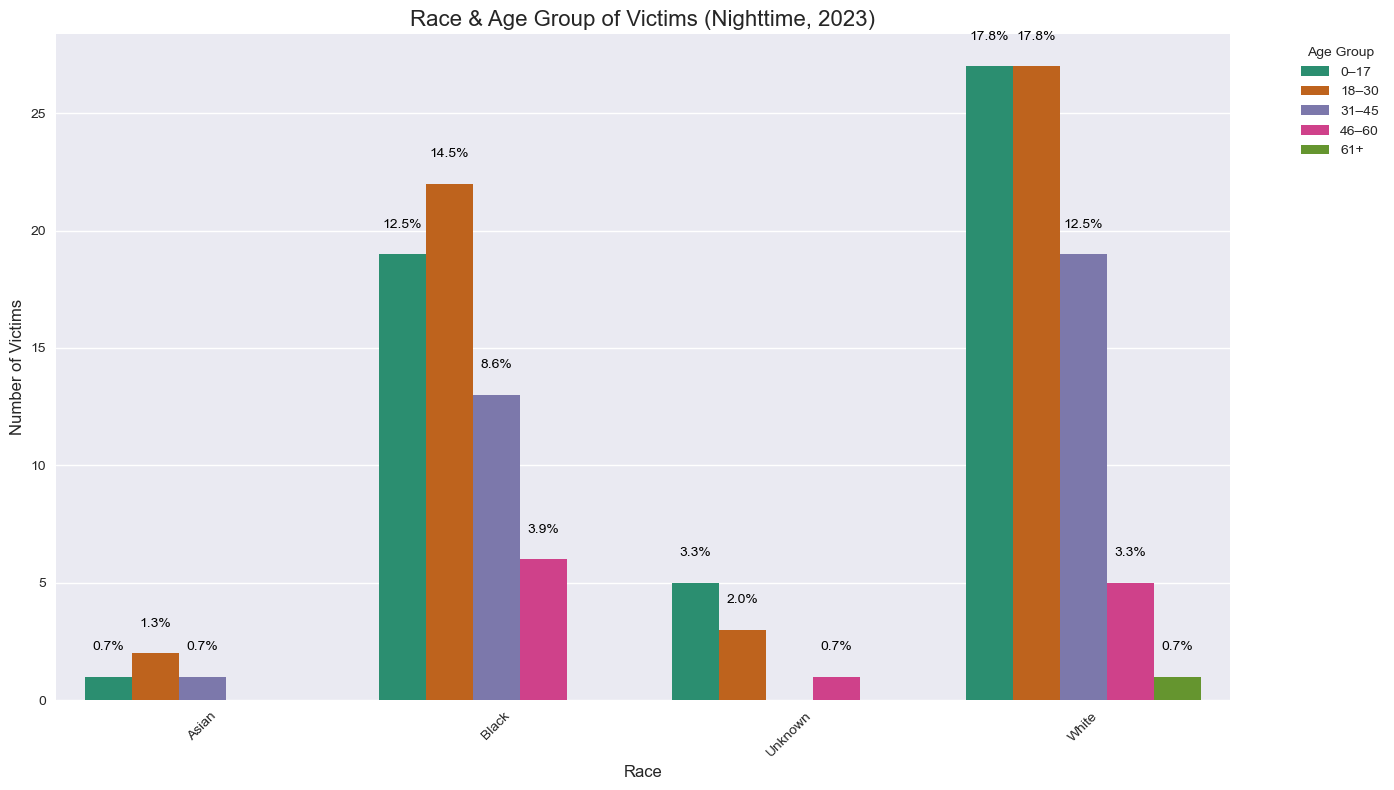

In [56]:
# Ensure datetime format
night_df['Offense Start Date'] = pd.to_datetime(night_df['Offense Start Date'], errors='coerce')

# Extract year
night_df['Year'] = night_df['Offense Start Date'].dt.year

# Filter for 2023 only (nighttime already handled in night_df)
df_2023_night = night_df[night_df['Year'] == 2023]

# Define age bins and labels
bins = [0, 17, 30, 45, 60, 150]
age_labels = ['0–17', '18–30', '31–45', '46–60', '61+']
df_2023_night['Age Group'] = pd.cut(df_2023_night['Age'], bins=bins, labels=age_labels, right=True)

# Group by Race and Age Group
race_age_counts = df_2023_night.groupby(['Race', 'Age Group']).size().reset_index(name='Victim Count')

# Calculate total for percentage
total_victims = race_age_counts['Victim Count'].sum()
race_age_counts['Percentage'] = (race_age_counts['Victim Count'] / total_victims * 100).round(2)

# Create grouped bar chart with dark palette
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=race_age_counts,
    x='Race',
    y='Victim Count',
    hue='Age Group',
    palette='Dark2'
)

# Add percentage labels on top of bars
for container in barplot.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            barplot.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f"{(height / total_victims) * 100:.1f}%",
                ha='center',
                va='bottom',
                fontsize=10,
                color='black'
            )

# Add labels and title
plt.title("Race & Age Group of Victims (Nighttime, 2023)", fontsize=16)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Number of Victims", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [57]:
night_df


,Reporting Event Number,Age,Sex,Race,Ethnicity,Offense Start Date,Offense Code Name,NIBRS Code,Case Status,Division,Offense Address,Latitude,Longitude,COUNDIST,District_Count,Hour,Is_Nighttime,Year,month
1954,LMPD23046471,12,Female,White,Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,8,"4808 MIDDLESEX DR\nWORTHINGTON HILLS, KY 40245",38.308736,-85.522934,17,48.0,0,True,2023,1
1955,LMPD23088980,15,Female,White,Not Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,8,"3106 KINVARA LN\nGOOSE CREEK, KY 40242",38.291753,-85.592448,17,48.0,0,True,2023,1
1961,8023001005,11,Female,White,Not Hispanic Or Latino,2023-01-02 18:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,Open/Active (MIG),6,"2830 POMEROY DR\nLOUISVILLE, KY 40218\nUNITED ...",38.199039,-85.635948,10,91.0,18,True,2023,1
1962,8023001274,17,Female,White,Not Hispanic Or Latino,2023-01-02 20:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),1,"1698 MAGAZINE ST\nLOUISVILLE, KY 40203\nUNITED...",38.250003,-85.779622,4,307.0,20,True,2023,1
1964,8023001635,19,Female,White,Not Hispanic Or Latino,2023-01-04 01:08:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),4,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.239471,-85.761667,6,152.0,1,True,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,LMPD23123249,16,Female,White,Hispanic Or Latino,2023-12-14 03:50:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,6,"1367 GARDINER LN\nWATTERSON PARK, KY 40213",38.197717,-85.700115,10,91.0,3,True,2023,12
2263,LMPD23129385,18,Female,White,Hispanic Or Latino,2023-12-15 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,7,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.170449,-85.603572,26,52.0,0,True,2023,12
2264,LMPD23124681,31,Female,White,Not Hispanic Or Latino,2023-12-15 22:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,SVU Only - Victim Requests Closure,2,"4713 BEECH DR\nLOUISVILLE, KY 40216",38.202771,-85.844656,1,100.0,22,True,2023,12
2268,LMPD23128103,27,Female,White,NaN,2023-12-26 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,1,"400 S 6TH ST\nLOUISVILLE, KY 40202",38.253217,-85.761074,4,307.0,0,True,2023,12


In [ ]:
# Define path to your Documents folder
documents_path = os.path.expanduser("~/Documents")

# Define filename
filename = "night_df.csv"

# Full path
full_path = os.path.join(documents_path, filename)

# Save DataFrame
df_2023_night.to_csv(full_path, index=False)

print(f"Saved df_2023_night to: {full_path}")
